In [34]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for prettier plots


In [35]:
# Load the malware dataset
df = pd.read_csv('Microsoft_malware_dataset_min.csv')

# Show the first few rows to understand the structure
df.head()



,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [36]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [37]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [38]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Malware Dataset Profiling Report", explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

## 🧠 Column Explanation + Missing Values Strategy

| 🏷 Column Name                | 🧬 Human Meaning                                                       | 🧪 How Important?                        | ⚕️ What To Do If Null                                            |
|-----------------------------|------------------------------------------------------------------------|-----------------------------------------|------------------------------------------------------------------|
| `HasDetections`             | **TARGET!** Did the machine get malware? (1 = yes, 0 = no)             | 🌟 Super important (target variable)     | ✅ No nulls — safe!                                              |
| `Wdft_IsGamer`              | Is the device used for gaming? (1 = yes, 0 = no)                       | 🤔 Kinda useful for user behavior        | 🔧 Fill with `mode()` or make a category like "Unknown"         |
| `Census_IsVirtualDevice`    | Is it a virtual machine? (cloud/testing system?)                      | 💡 Could matter for behavior patterns    | 🔧 Fill with `mode()` or label as "Unknown"                     |
| `Census_OSEdition`          | Type of Windows installed (e.g., Home, Pro, Enterprise)                | 📦 OS-level insight                      | ✅ No nulls — all good                                           |
| `Census_HasOpticalDiskDrive`| Does the machine have a CD/DVD drive? (1 = yes, 0 = no)               | 🧓 Mostly legacy — not very critical     | ✅ No nulls — nothing to fix                                     |
| `Firewall`                  | Is the firewall turned on?                                            | 🔥 Pretty useful for protection signals  | 🔧 Fill with `mode()`                                           |
| `SMode`                     | Is Windows running in S Mode (restricted/security-focused)?           | 🛡️ Security-related setting              | ⚠️ A lot of missing (≈22%) → fill or drop depending on impact   |
| `IsProtected`               | Is there protection software installed?                               | 🦾 Definitely useful                     | 🔧 Fill with `mode()` or flag as “Unknown”                      |
| `OsPlatformSubRelease`      | Specific Windows release/version (e.g., rs3, rs4...)                  | 🧬 Helps identify vulnerabilities         | ✅ No nulls — keep it                                            |
| `CountryIdentifier`         | Encoded country of the machine                                        | 🌍 Useful for geo-based malware trends   | ✅ No nulls — good to go                                         |


In [40]:
df.duplicated().sum()

79581

In [41]:
for col in ['Wdft_IsGamer', 'Census_IsVirtualDevice', 'Firewall', 'SMode', 'IsProtected']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [42]:
(df.isnull().sum() / len(df)) * 100


HasDetections                 0.0
Wdft_IsGamer                  0.0
Census_IsVirtualDevice        0.0
Census_OSEdition              0.0
Census_HasOpticalDiskDrive    0.0
Firewall                      0.0
SMode                         0.0
IsProtected                   0.0
OsPlatformSubRelease          0.0
CountryIdentifier             0.0
dtype: float64

In [43]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [44]:
df.duplicated().sum()

83886

In [45]:
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [46]:
# Check for exact duplicates
dupes = df[df.duplicated()]
print(f"Number of duplicates: {len(dupes)}")
dupes.head()


Number of duplicates: 83886


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
105,0,0.0,0.0,CoreCountrySpecific,0,1.0,0.0,1.0,rs3,43
122,0,0.0,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29
145,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,171
147,0,0.0,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29
152,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,149


🕵️‍♀️ Suspicion                                       |      🤯 Explanation

Dataset contains repeated logs                     | Some machines might have been scanned multiple times with no change

Poor deduplication upstream                        | Microsoft may have kept logs from different days but didn’t mark them

Some columns irrelevant                            | You might be better off deduping only on key features

In [47]:
# Choose the features you care about
key_features = ['Census_OSEdition', 'Wdft_IsGamer', 'Firewall', 'CountryIdentifier']
df = df.drop_duplicates(subset=key_features)


In [48]:
df.duplicated().sum()

0

In [49]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [50]:
# Count how many 0s exist per column
zero_counts = (df == 0).sum()
zero_counts[zero_counts > 0].sort_values(ascending=False)


SMode                         2402
Census_IsVirtualDevice        2327
Census_HasOpticalDiskDrive    2210
Wdft_IsGamer                  1395
HasDetections                 1214
Firewall                       537
IsProtected                    143
dtype: int64

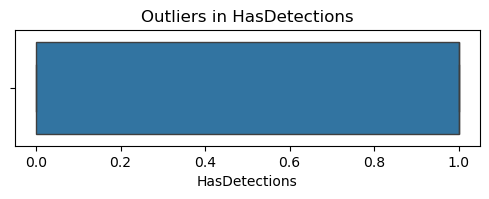

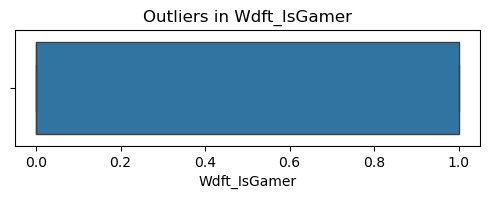

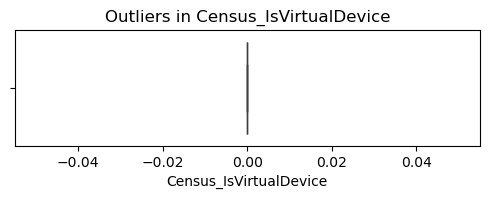

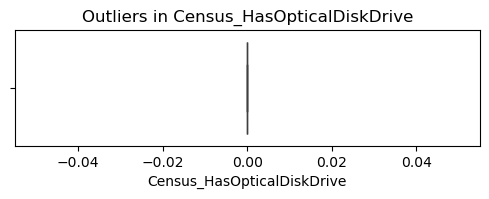

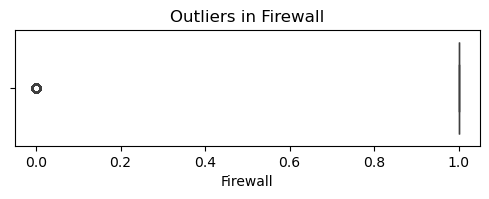

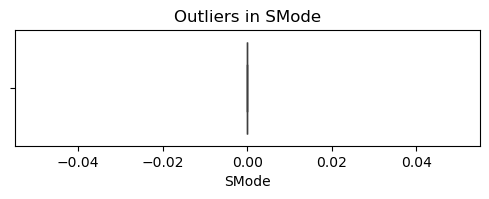

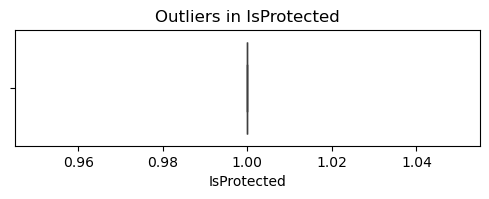

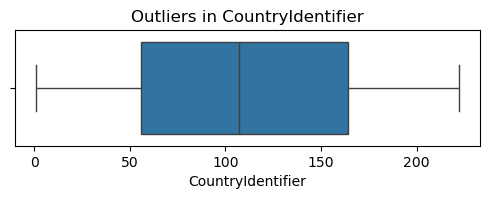

In [59]:
import seaborn as sns
import matplotlib.pyplot as pltlude

# Handling outliers: remove rows that are 3 std devs away from mean (optional)
for col in df.select_dtypes(include=np.number).columns:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))] 
    
%matplotlib inline  

# Visualize with boxplots
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

# there are no outliers


In [52]:
df_encoded = pd.get_dummies(df, columns=["Census_OSEdition", "OsPlatformSubRelease"], drop_first=True)


In [53]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("HasDetections", axis=1)
y = df_encoded["HasDetections"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


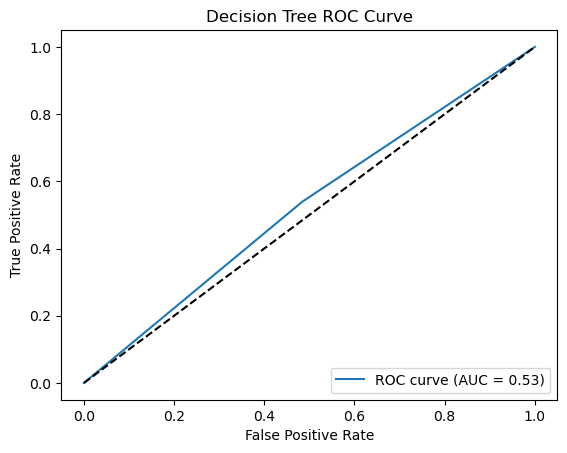

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_probs = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [55]:
clf_tuned = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)
clf_tuned.fit(X_train, y_train)

# Recalculate and replot the ROC as above if needed


DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)

## Drop the Target Column



In [56]:
X_unsupervised = df_encoded.drop("HasDetections", axis=1)
X_unsupervised

,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,Census_OSEdition_CoreN,...,Census_OSEdition_ServerStandard,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0.0,0.0,0,1.0,0.0,1.0,29,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.0,0.0,0,1.0,0.0,1.0,93,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.0,0.0,0,1.0,0.0,1.0,86,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.0,0.0,0,1.0,0.0,1.0,88,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0.0,0.0,0,1.0,0.0,1.0,18,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99366,0.0,0.0,0,1.0,0.0,1.0,128,False,False,False,...,False,False,False,False,False,True,False,False,False,False
99408,0.0,0.0,0,1.0,0.0,1.0,150,False,False,False,...,False,False,False,False,True,False,False,False,False,False
99836,1.0,0.0,0,1.0,0.0,1.0,14,True,False,False,...,False,False,False,False,False,True,False,False,False,False
99839,0.0,0.0,0,1.0,0.0,1.0,84,False,False,False,...,False,False,False,False,False,False,True,False,False,False


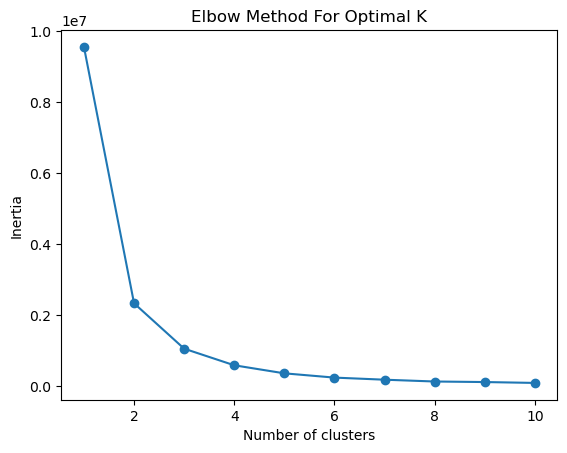

In [57]:
#from sklearn.cluster import KMeans
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_unsupervised)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


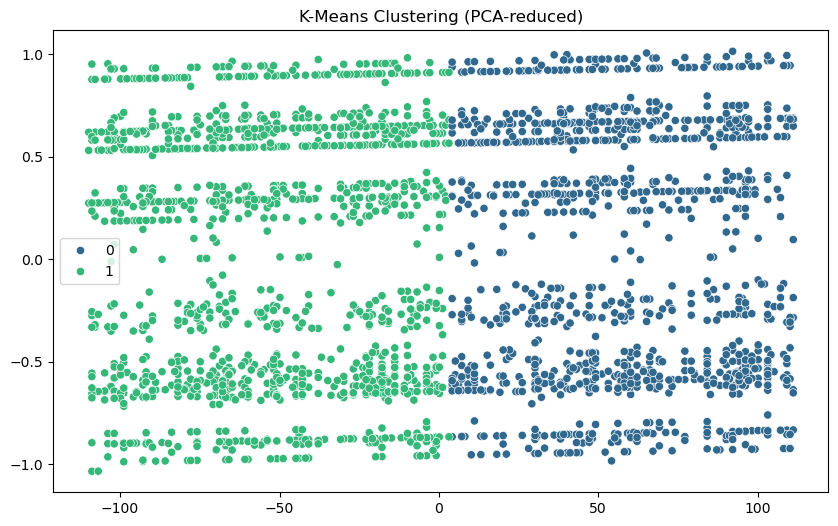

In [58]:
from sklearn.decomposition import PCA
import seaborn as sns

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_unsupervised)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(X_unsupervised)

plt.figure(figsize=(10,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=labels, palette='viridis')
plt.title('K-Means Clustering (PCA-reduced)')
plt.show()
